# 4. Citybenches: Implementation

In [71]:
#Necessary packages
import osmnx as ox
import networkx as nx
import geopandas 
import matplotlib.pyplot as plt
import pandas as pd

## Results of Data Wrangling Round 1

In [72]:
#Import data frame, adding 'New York City' to every field in Address-column
df = pd.read_excel('citybenchlocationsv03.xlsx')
df['Address'] = df['Address'] + ', New York City'

In [73]:
df.head(20)

,Bench\nCount,Address,On Street,Cross Streets,Borough,Bench\nType,Installation\nDate
0,1,"540 West 145th Street, New York City",West 145th Street,Broadway and Amsterdam Avenue,Manhattan,backless,2012-05-17
1,2,"110 East 149th Street, New York City",West 149th Street,Gerard Avenue River Avenue,Bronx,backless,2012-05-16
2,3,"125 East 149th Street, New York City",East 149th Street,Gerard Avenue & Walton Avenue,Bronx,backless,2012-05-16
3,4,"360 East 149th Street, New York City",East 149th Street,Courtlandt and Melrose Avenues,Bronx,backless,2012-05-16
4,5,"414 & 416 East 149th Street, New York City",East 149th Street,Bergen and Third Avenues,Bronx,backless,2012-05-16
5,6,"700 Southern Boulevard, New York City",Southern Boulevard,Leggett Avenue and East 156th Street,Bronx,backless,2012-05-16
6,7,"302 Broadway, New York City",Broadway,Marcy Avenue and Rodney Street,Brooklyn,backless,2012-04-14
7,8,"825 Broadway & 829 Broadway, New York City",Broadway,Park Street and Ellery Street,Brooklyn,backless,2012-04-14
8,9,"893 Broadway, New York City",Broadway,Arion Place and Belvedere Street,Brooklyn,backless,2012-04-14
9,10,"57 Malcolm X Boulevard, New York City",Malcolm X Boulevard,Lafayette Avenue & Van Buren Street,Brooklyn,backless,2013-12-13


In [74]:
#Subset original data set
addressborough = df[['Address', 'Borough']]

In [75]:
#Further subsetting
addressm = addressborough.loc[addressborough['Borough'] == 'Manhattan']

In [76]:
addressm.head(20)

,Address,Borough
0,"540 West 145th Street, New York City",Manhattan
56,"145 & 147 Madison Ave, New York City",Manhattan
57,"165 Madison Avenue, New York City",Manhattan
58,"191 Madison Avenue, New York City",Manhattan
59,"199 Madison Avenue, New York City",Manhattan
60,"227 Madison Avenue, New York City",Manhattan
88,"175 East 96th Street, New York City",Manhattan
91,"201 West 106th Street, New York City",Manhattan
94,"1020 Third Avenue, New York City",Manhattan
99,"209 West 96th Street, New York City",Manhattan


In [77]:
print(addressm[addressm['Address'] == "Lexington Avenue & East 118th Street, New York City"])

                                               Address    Borough
229  Lexington Avenue & East 118th Street, New York...  Manhattan


## 4.1 Data Wrangling: Round 2

In [8]:
#Adding a column with Geocodes to df
addressgeo = []
for i in addressm['Address']:
    try:
        addressgeo.append(ox.geocode(i))
        print(ox.geocode(i))
    except:
        addressgeo.append(' ')
        pass
addressm.insert(2, 'Geocode', addressgeo, True)

(40.8260052, -73.949854)
(40.74619633333333, -73.983977)
(40.746812750000004, -73.98327882871746)
(40.74802628571428, -73.98264385714285)
(40.7482878, -73.9824103)
(40.7598067, -73.9741741)
(40.785616, -73.9498645)
(40.8006923, -73.9659254)
(40.812824, -73.923829)
(40.7946572, -73.97102558044648)
(40.711920199999994, -73.95384408072891)
(40.711920199999994, -73.95384408072891)
(40.72743495, -74.00073330000001)
(40.7945587, -73.9687567)
(40.7945587, -73.9687567)
(40.8531163, -73.9355226)
(40.8681188, -73.9204207)
(40.77706815, -73.97959553350846)
(40.77706815, -73.97959553350846)
(40.812104142857144, -73.94244528571429)
(40.8123399, -73.9417629)
(40.8000674, -73.951543713737)
(40.7272907, -74.0057436)
(40.7272907, -74.0057436)
(40.7265969, -74.00541)
(40.7265969, -74.00541)
(40.7232317, -74.0069711)
(40.7232317, -74.0069711)
(40.7264039, -74.0072925)
(40.7275353, -74.0081354)
(40.7275353, -74.0081354)
(40.7274727, -74.0074855)
(40.7274727, -74.0074855)
(40.706224, -74.00574533333332)
(4

In [70]:
addressm.head(20)

,Address,Borough,Geocode
0,"540 West 145th Street, New York City",Manhattan,"(40.8260052, -73.949854)"
56,"145 & 147 Madison Ave, New York City",Manhattan,"(40.74619633333333, -73.983977)"
57,"165 Madison Avenue, New York City",Manhattan,"(40.746812750000004, -73.98327882871746)"
58,"191 Madison Avenue, New York City",Manhattan,"(40.74802628571428, -73.98264385714285)"
59,"199 Madison Avenue, New York City",Manhattan,"(40.7482878, -73.9824103)"
60,"227 Madison Avenue, New York City",Manhattan,"(40.7598067, -73.9741741)"
88,"175 East 96th Street, New York City",Manhattan,"(40.785616, -73.9498645)"
91,"201 West 106th Street, New York City",Manhattan,"(40.8006923, -73.9659254)"
94,"1020 Third Avenue, New York City",Manhattan,"(40.812824, -73.923829)"
99,"209 West 96th Street, New York City",Manhattan,"(40.7946572, -73.97102558044648)"


In [58]:
addressm.to_excel('addressm.xlsx', index = False)

In [78]:
data = pd.read_excel('addressm.xlsx')

In [60]:
fgeocode = []
for i in range(len(addressm)):
    if addressm.iloc[i]['Geocode'] == ' ':
        fgeocode.append(addressm.index[i])       
print(fgeocode)

[229, 234, 273, 275, 276, 339, 367, 494, 495, 623, 624, 832, 845, 896, 964, 1095, 1096, 1097, 1098, 1131, 1132, 1334, 1337, 1384, 1440, 1861, 1862, 1863, 1864, 1947, 2023, 2059]


In [67]:
for i in fgeocode:
    print(addressm.loc[i]['Address'])

Lexington Avenue & East 118th Street, New York City
240 First Avenue, New York City
125 East 116thStreet, New York City
421-435 East 116th Street, New York City
421-435 East 116th Street, New York City
617 Second Avenue, New York City
East Houston and Bowery, New York City
West 36th Street between 9th Avenue &
Dyer Avenue, New York City
West 36th Street between 9th Avenue &
Dyer Avenue, New York City
York Avenue between E70th & E71st
Street, New York City
York Avenue between E70th & E71st
Street, New York City
2nd Avenue between E90th & E91st
Street, New York City
250 W65th Street, New York City
518 West 125 Street, New York City
2611 Frederick Douglas Boulevard, New York City
Varick Street between Watts Street &
Broome Street, New York City
Varick Street between Watts Street &
Broome Street, New York City
Hudson Street between Canal Street &
Broome Street, New York City
Hudson Street between Canal Street &
Broome Street, New York City
Division Street between Market &
Forsyth Street, N

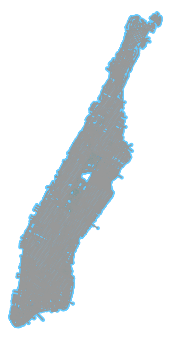

(<Figure size 273.909x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c2e7250>)

In [79]:
#Choosing a graph that contains all ten addresses (suboptimal solution)
G = ox.graph_from_place('Manhattan, New York City', network_type = 'walk', simplify = False)
ox.plot_graph(G)

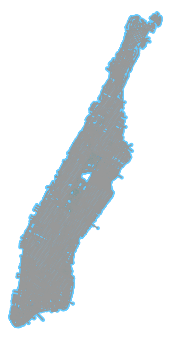

(<Figure size 273.909x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a3717ab90>)

In [80]:
ox.plot_graph(G)

In [81]:
#Adding a column with Nodes to df
addressnode = []
for i in addressgeo['Geocode']:
    addressnode.append(ox.get_nearest_node(G, i))    
address.insert(3, 'Node', addressnode, True)

TypeError: list indices must be integers or slices, not str